# Importar librerias

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns

# Diseño de la red neuronal SOM


In [ ]:
entradas = np.array([[0.44, 0.14],[0.61, 0.79]])  # ,[0.94, 1]
iters = 20
alfa_i = 0.7
alfa_f = 0.1
ro_i = 0.3
ro_f = 0.05

In [2]:
def generar_matriz_pesos(size, neuronas_cs):
  matriz_pesos = []
  # generar W's para las N neuronas de la CS
  for i in range(neuronas_cs):  
    w = 2*np.random.rand(size)-1 # generar W respecto al nro de entradas
    matriz_pesos.append(w)
  return matriz_pesos

In [ ]:
generar_matriz_pesos(2,4)

[array([ 0.53875589, -0.71649685]),
 array([0.38523253, 0.23728734]),
 array([ 0.42778   , -0.74102847]),
 array([0.86419062, 0.19644807])]

In [3]:
def calcular_similitud(patron, matriz_pesos):
  similitudes = []
  for pesos in matriz_pesos:
    # Distancia Euclidiana
    # APLICANDO: R = RAIZ((w1-x1)^2 + (w2-x2)^2 + ...)
    s = np.linalg.norm(pesos - patron)
    similitudes.append(s)
  return similitudes

In [ ]:
matriz_pesos = np.array([[0.9, 0.7],[0.1, 0.4],[0.8, 0.2],[0.9, 0.3]])
patron = np.array([0.444445, 0.14444445])
similitudes = calcular_similitud(patron, matriz_pesos)
similitudes

[0.718451339452299,
 0.4288950887580814,
 0.3598691111512664,
 0.48138122850896725]

In [4]:
def determinar_neurona_ganadora(similitudes):
  # recuperar la minima distancia
  dist_min = np.min(similitudes)
  # encontrar posicion de la neurona ganadora
  neurona_ganadora = similitudes.index(dist_min)
  return neurona_ganadora

In [ ]:
pos_neu_winner = determinar_neurona_ganadora(similitudes)
pos_neu_winner

2

In [5]:
def Determinar_vecinos(neurona_ganadora, matriz_pesos, ro):
  # Extraer los pesos de la neurona ganadora
  pesos_winner = matriz_pesos[neurona_ganadora]
  # Calcular la similitud respecto a la neurona ganadora
  similitudes = calcular_similitud(pesos_winner, matriz_pesos)
  # calcular h(n) (aplicando la funcion de vecindad)
  h = [1 if val <= ro else 0 for val in similitudes]
  return h

In [ ]:
ro = 0.279
Determinar_vecinos(pos_neu_winner, matriz_pesos, ro)

[0, 0, 1, 1]

In [6]:
def Actualizar_pesos(matriz_pesos, alfa, h, patron):
  # Actualizar los pesos de cada neurona de la capa de salida
  for i in range(len(h)):
    if h[i] == 1: # actualizar pesos si el valor de "h" es 1
      nuevo_peso = matriz_pesos[i] + alfa * h[i] * (patron - matriz_pesos[i])
      matriz_pesos[i] = nuevo_peso
  # retornar pesos actualizados de las neuronas
  return matriz_pesos

In [ ]:
alfa = 0.595
h = [0,0,1,1]
patron = [0.44, 0.14]
Actualizar_pesos(matriz_pesos, alfa, h, patron)

array([[0.9   , 0.7   ],
       [0.1   , 0.4   ],
       [0.5858, 0.1643],
       [0.6263, 0.2048]])

In [7]:
def rna_SOM(entradas, neuronas_cs, alfa_inicial, alfa_final, ro_inicial, ro_final, iters):
  # 1) Inicializar los pesos entre [-1,1] para las N neuronas de la CS 
  size = len(entradas[0]) # calcular cantidad de caracteristicas
  matriz_pesos = generar_matriz_pesos(size, neuronas_cs)
  # aplicar las operaciones para N iteraciones
  t=1
  while t <= iters:
    # ajustar "alfa" y "ro" en cada iteracion
    alfa = alfa_inicial*(alfa_final/alfa_inicial)**(t/iters)
    ro = ro_inicial + (ro_final - ro_inicial)*(t/iters)
    # 2) Presentacion de cada patrón de entrada 
    for patron_x in entradas:
      # 3) Calcular la similitud entre W y X
      similitudes = calcular_similitud(patron_x, matriz_pesos)
      # 4) Determinar la neurona ganadora
      neurona_ganadora = determinar_neurona_ganadora(similitudes)
      # 5.1) Determinar quienes son los vecinos (aplicando funcion de vecindad)
      h = Determinar_vecinos(neurona_ganadora, matriz_pesos, ro)
      # 5.2) Actualizar los pesos W's
      matriz_pesos = Actualizar_pesos(matriz_pesos, alfa, h, patron_x)
    t+=1 
  # retornar los pesos finales   
  return matriz_pesos

In [94]:
# Calcular las resultantes de los pesos finales
def resultantes_neuronas(pesos_SOM):
  resultantes = [] # vector para almacenar las resultantes de los pesos de la red SOM
  # calcular la resultante para cada conjunto de pesos que llega a cada neurona
  for pesos in pesos_SOM:
    # aplicar R = sqrt(w1^2 + w2^2+ w3^2+...)
    r = np.linalg.norm(pesos)
    resultantes.append(r)
  return np.array(resultantes)

#LECTURA DE DATOS

In [39]:
df = pd.read_csv("ds_cluster11.csv")
df.head()

,x,y
0,5.1,0.2
1,4.9,0.2
2,4.7,0.2
3,4.6,0.2
4,5.0,0.2


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       150 non-null    float64
 1   y       150 non-null    float64
dtypes: float64(2)
memory usage: 2.5 KB


In [96]:
df.describe()

,x,y
count,150.000000,150.000000
mean,5.843333,1.199333
std,0.828066,0.762238
min,4.300000,0.100000
25%,5.100000,0.300000
50%,5.800000,1.300000
75%,6.400000,1.800000
max,7.900000,2.500000


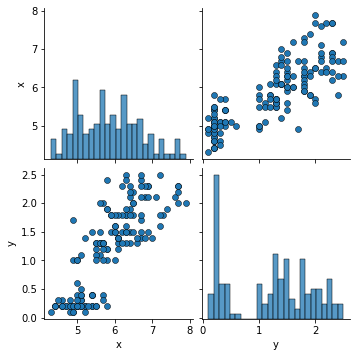

In [97]:
# matriz de scatterplots(gráficos de dispersión)
sns.pairplot(data=df[df.columns[0:2]], diag_kws={'edgecolor':'k', 'bins':25}, plot_kws={'edgecolor':'k'})
plt.show()

In [151]:
datos_de_entrada = df.copy()
# Normalizacion de datos
scaler = preprocessing.StandardScaler()
scaler.fit(datos_de_entrada)
# =========== TRANSFORMANDO =========== 
datos_de_entrada = scaler.transform(datos_de_entrada)

# MODELADO

In [152]:
# Especificaciones de los parametros a pasar a la RNA SOM
iters = 20
alfa_i = 0.7
alfa_f = 0.1
ro_i = 0.3
ro_f = 0.05
nro_neuronas_cs = 1000

In [153]:
# Crear el modelo de la RNA SOM y obtener los pesos finales
SOM = rna_SOM(datos_de_entrada,nro_neuronas_cs, alfa_i, alfa_f, ro_i, ro_f, iters)

In [154]:
# Obtener las resultantes de los pesos finales de cada neurona
R_neuronas = resultantes_neuronas(SOM)

In [155]:
len(R_neuronas)

1000

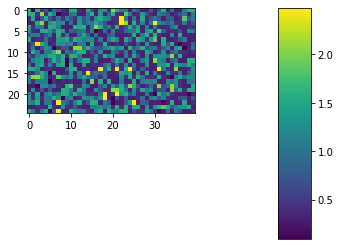

In [156]:
matriz = np.reshape(R_neuronas,(25,40))
# graficando haciendo uso de la funcion imshow de matplotlib
plt.subplot(211)
plt.imshow(matriz) 
# personalizacion
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
# mostrar grafico
plt.show()

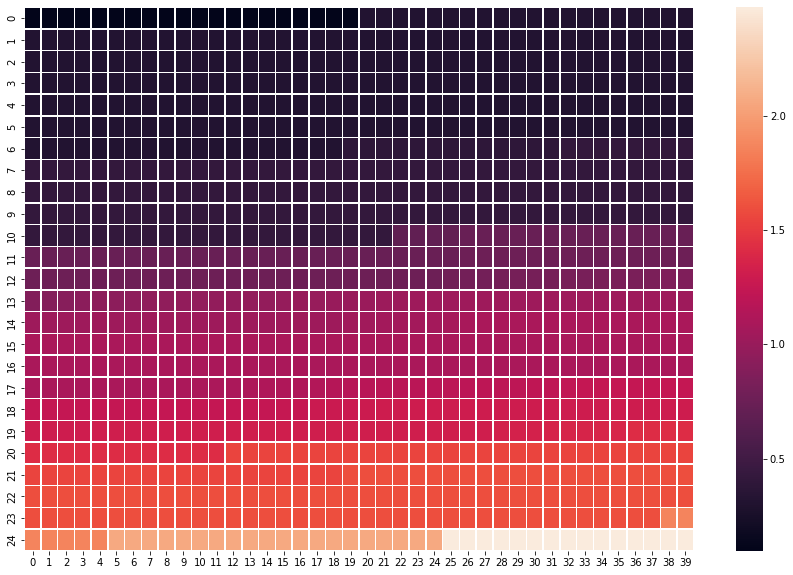

In [162]:
# graficando haciendo uso de la funcion heatmap de seaborn
aux = np.sort(R_neuronas)
matriz2 = np.reshape(aux,(25,40))
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(matriz2,linewidths = .5)

In [62]:
from mpl_toolkits.mplot3d import Axes3D

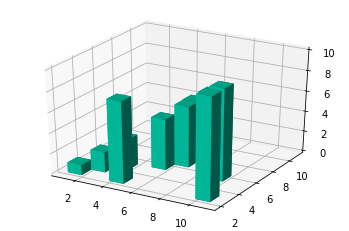

In [74]:
fig = plt.figure()
ax1 = fig.add_subplot(111, projection = '3d')

xpos = [1,2,3,4,5,6,7,4,9,10]
ypos = [2,3,4,10,5,6,7,2,5,2]
zpos = np.zeros(10)

dx = np.ones(10)
dy = np.ones(10)
dz = [x+1 for x in range(10)]

ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color='#00ceaa')
plt.show()

In [ ]:
#R_neuronas
fig = plt.figure()
ax1 = fig.add_subplot(111, projection = '3d')

dim = 1000

xpos = [(x+1/500) for x in range(dim)]
ypos = R_neuronas
zpos = np.zeros(10)

dx = np.ones(dim)
dy = np.ones(dim)
dz = [(x+1/500) for x in range(dim)]

ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color='#00ceaa')
plt.show()

# LECTURA DEL 2DO DATASET

In [134]:
df2 = pd.read_csv("ds_cluster55.csv")
df2.head()

,latitud,longitud,profundidad
0,-20.42,181.62,562
1,-20.62,181.03,650
2,-26.00,184.10,42
3,-17.97,181.66,626
4,-20.42,181.96,649


In [135]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   latitud      1000 non-null   float64
 1   longitud     1000 non-null   float64
 2   profundidad  1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


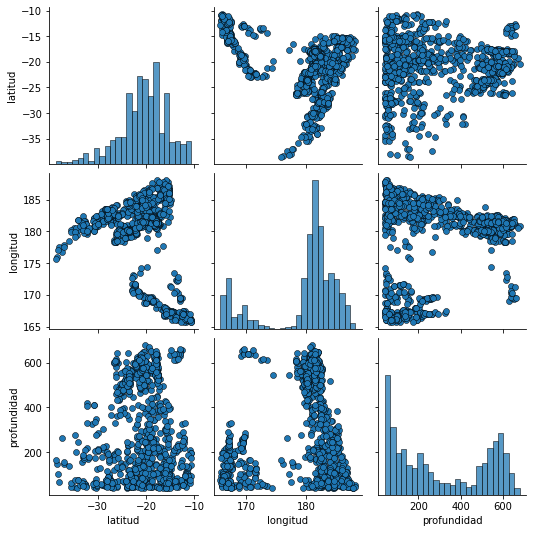

In [114]:
# matriz de scatterplots(gráficos de dispersión)
sns.pairplot(data=df2[df2.columns[0:3]], diag_kws={'edgecolor':'k', 'bins':25}, plot_kws={'edgecolor':'k'})
plt.show()

In [163]:
# Normalizacion de datos
X = df2.copy()

scaler = preprocessing.StandardScaler()
scaler.fit(X)
# =========== TRANSFORMANDO =========== 
X = scaler.transform(X)

In [137]:
# Especificaciones de los parametros a pasar a la RNA SOM
iters = 20
alfa_i = 0.7
alfa_f = 0.1
ro_i = 0.3
ro_f = 0.05
nro_neuronas_cs = 100

In [164]:
SOM2 = rna_SOM(X, nro_neuronas_cs, alfa_i, alfa_f, ro_i, ro_f, iters)

In [167]:
len(SOM2)

1000

In [168]:
# Obtener las resultantes de los pesos finales de cada neurona
R_neuronas2 = resultantes_neuronas(SOM2)
# redimensionamos la matriz resultante
matriz_ = np.reshape(R_neuronas2,(25,40))

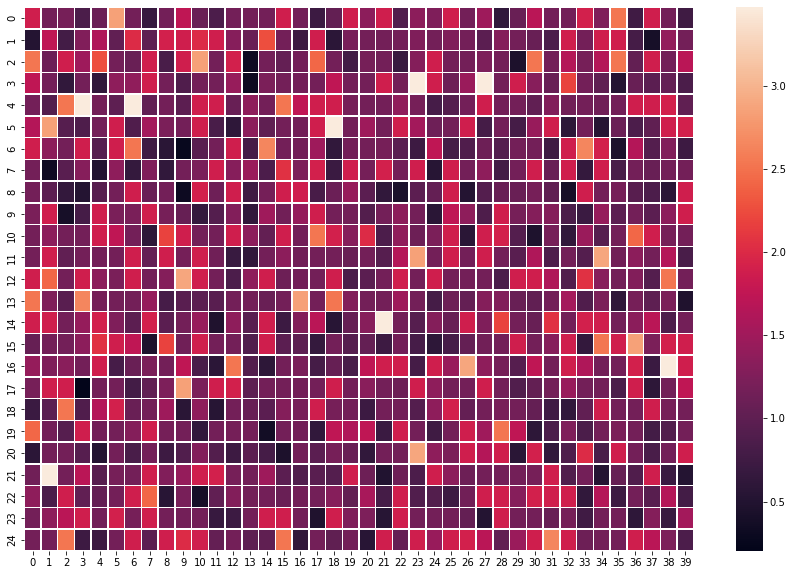

In [170]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(matriz_, linewidths = .5)